In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/ML/titanic

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ML/titanic


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

데이터 살펴보기

In [440]:
traindata = pd.read_csv('train.csv')
testtmp =  pd.read_csv('test.csv')
testdata = testtmp.copy()
traindata.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


데이터 시각화

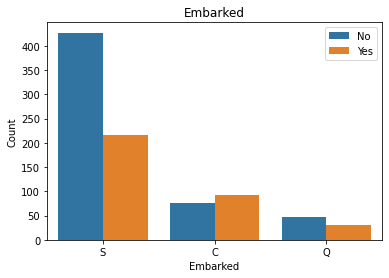

In [ ]:
ax = sns.countplot(x = 'Embarked', hue = 'Survived', data = traindata)
ax.set_title('Embarked')
ax.set_xlabel('Embarked')
ax.set_ylabel('Count')
ax.legend(['No','Yes'],loc = 1)
plt.show()

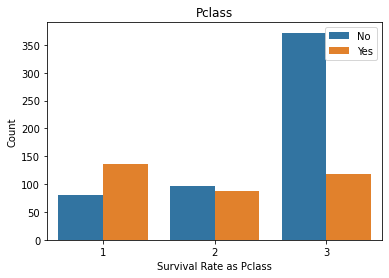

In [ ]:
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = traindata)
ax.set_title('Pclass')
ax.set_xlabel('Survival Rate as Pclass')
ax.set_ylabel('Count')
ax.legend(['No','Yes'],loc = 1)
plt.show()

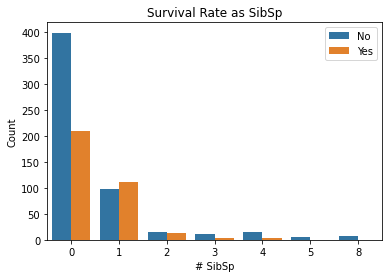

In [ ]:
ax = sns.countplot(x = 'SibSp', hue = 'Survived', data = traindata)
ax.set_title('Survival Rate as SibSp')
ax.set_xlabel('# SibSp')
ax.set_ylabel('Count')
ax.legend(['No','Yes'],loc = 1)
plt.show()

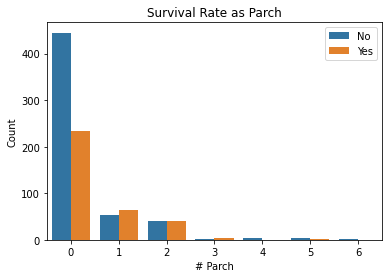

In [ ]:
ax = sns.countplot(x = 'Parch', hue = 'Survived', data = traindata)
ax.set_title('Survival Rate as Parch')
ax.set_xlabel('# Parch')
ax.set_ylabel('Count')
ax.legend(['No','Yes'],loc = 1)
plt.show()

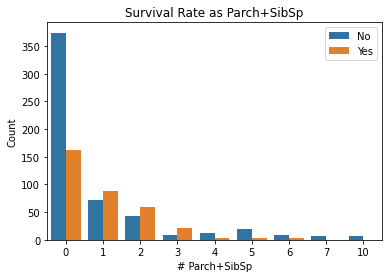

In [ ]:
sibpar = traindata['SibSp'] + traindata['Parch']
ax = sns.countplot(x = sibpar, hue = 'Survived', data = traindata)
ax.set_title('Survival Rate as Parch+SibSp')
ax.set_xlabel('# Parch+SibSp')
ax.set_ylabel('Count')
ax.legend(['No','Yes'],loc = 1)
plt.show()

데이터 처리

In [ ]:
traindata['SS+P'] = traindata['SibSp'] + traindata['Parch']
testdata['SS+P'] = testdata['SibSp'] + testdata['Parch']

traindata.drop(['Name','Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch', 'Fare'],axis=1, inplace = True)
testdata.drop(['Name','Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch', 'Fare'],axis=1, inplace = True)

traindata.head(10)

,Survived,Pclass,Sex,Age,Embarked,SS+P
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0
5,0,3,male,NaN,Q,0
6,0,1,male,54.0,S,0
7,0,3,male,2.0,S,4
8,1,3,female,27.0,S,2
9,1,2,female,14.0,C,1


In [ ]:
# sex와 embaked를 0,1,2...로 바꿈
sexmap = {'male': 0, 'female': 1}
embarkmap = {'S': 0, 'C': 1, 'Q':2}

traindata['Sex'] = traindata['Sex'].map(sexmap)
traindata['Embarked'] = traindata['Embarked'].map(embarkmap)
testdata['Sex'] = testdata['Sex'].map(sexmap)
testdata['Embarked'] = testdata['Embarked'].map(embarkmap)

traindata.head(10)

,Survived,Pclass,Sex,Age,Embarked,SS+P
0,0,3,0,22.0,0.0,1
1,1,1,1,38.0,1.0,1
2,1,3,1,26.0,0.0,0
3,1,1,1,35.0,0.0,1
4,0,3,0,35.0,0.0,0
5,0,3,0,NaN,2.0,0
6,0,1,0,54.0,0.0,0
7,0,3,0,2.0,0.0,4
8,1,3,1,27.0,0.0,2
9,1,2,1,14.0,1.0,1


In [ ]:
# Age, Embarked의 NaN값을 각각 중앙값, 최빈값(S=0)으로 바
traindata['Age'] = traindata['Age'].fillna(traindata['Age'].median())
traindata['Embarked'] = traindata['Embarked'].fillna(0)
testdata['Age'] = testdata['Age'].fillna(testdata['Age'].median())
testdata['Embarked'] = testdata['Embarked'].fillna(0)
traindata.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
SS+P        0
dtype: int64

In [ ]:
#Age를 10단위로 분류함
traindata['Age'] = traindata['Age']/10
traindata = traindata.round(0).astype('int')
testdata['Age'] = testdata['Age']/10
testdata = testdata.round(0).astype('int')

traindata.head()

,Survived,Pclass,Sex,Age,Embarked,SS+P
0,0,3,0,2,0,1
1,1,1,1,4,1,1
2,1,3,1,3,0,0
3,1,1,1,4,0,1
4,0,3,0,4,0,0


In [ ]:
traindata.describe()

,Survived,Pclass,Sex,Age,Embarked,SS+P
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,2.961841,0.361392,0.904602
std,0.486592,0.836071,0.477990,1.329316,0.635673,1.613459
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,4.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,8.000000,2.000000,10.000000


In [437]:
# train, test 분리
X = traindata.drop(['Survived'], axis=1)
Y = traindata['Survived']
X_test = testdata.copy()
X.shape, Y.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [438]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X, Y) * 100, 2)
acc_log


79.69

In [439]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

svc = SVC()
svc.fit(X, Y)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X, Y) * 100, 2)
acc_svc

82.72

In [441]:
submission = pd.DataFrame({
        "PassengerId": testtmp["PassengerId"],
        "Survived": Y_pred
  })

In [443]:
submission.to_csv('submission.csv', index=False)

In [445]:
!ls

gender_submission.csv  submission.csv  test.csv  titanic  train.csv
